## Importing important libraries

In [82]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
# Importing data 
df = pd.read_csv("time_series_covid19_confirmed_global.csv")
df.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  6/12/20  6/13/20  6/14/20  6/15/20  \
0        0        0        0  ...    23546    24102    24766    25527   
1        0        0        0  ...     1416     1464     1521     1590   
2        0        0        0  ...    10698    10810    10919    11031   
3        0        0        0  ...      853      853      853      853   
4        0        0        0  ...      130      138      140      142   

   6/16/20  6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  
0    26310    26874    27532    27878    28424    28833  
1     1672     1722     1788     1838     1891     1962  
2    11147    11268    11385    11504    11631    11771  
3      854      854      855      855      855      855  
4      148      155      166      172      176      183  

[5 rows x 156 columns]

In [84]:
#dropping unnecessary cols

df.drop(["Lat", "Long"], axis = 1, inplace = True)

In [85]:
df.head()

Province/State Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
0            NaN    Afghanistan        0        0        0        0        0   
1            NaN        Albania        0        0        0        0        0   
2            NaN        Algeria        0        0        0        0        0   
3            NaN        Andorra        0        0        0        0        0   
4            NaN         Angola        0        0        0        0        0   

   1/27/20  1/28/20  1/29/20  ...  6/12/20  6/13/20  6/14/20  6/15/20  \
0        0        0        0  ...    23546    24102    24766    25527   
1        0        0        0  ...     1416     1464     1521     1590   
2        0        0        0  ...    10698    10810    10919    11031   
3        0        0        0  ...      853      853      853      853   
4        0        0        0  ...      130      138      140      142   

   6/16/20  6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  
0    26310    26874    27532    27878    28424    28833  
1     1672     1722     1788     1838     1891     1962  
2    11147    11268    11385    11504    11631    11771  
3      854      854      855      855      855      855  
4      148      155      166      172      176      183  

[5 rows x 154 columns]

## Aggregating by country name

In [86]:
df_agg = df.groupby("Country/Region").sum()

In [87]:
df_agg.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  6/12/20  6/13/20  6/14/20  \
Country/Region                             ...                              
Afghanistan           0        0        0  ...    23546    24102    24766   
Albania               0        0        0  ...     1416     1464     1521   
Algeria               0        0        0  ...    10698    10810    10919   
Andorra               0        0        0  ...      853      853      853   
Angola                0        0        0  ...      130      138      140   

                6/15/20  6/16/20  6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  
Country/Region                                                                 
Afghanistan       25527    26310    26874    27532    27878    28424    28833  
Albania            1590     1672     1722     1788     1838     1891     1962  
Algeria           11031    11147    11268    11385    11504    11631    11771  
Andorra             853      854      854      855      855      855      855  
Angola              142      148      155      166      172      176      183  

[5 rows x 152 columns]

## Visualizing the confirmed cases yill 06/10/2020 (mm/dd/yyyy)

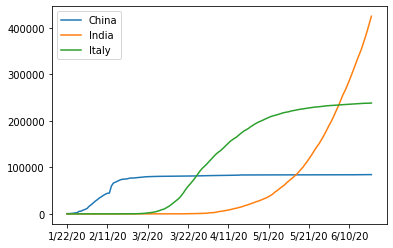

In [88]:
df_agg.loc['China'].plot()
df_agg.loc['India'].plot()
df_agg.loc['Italy'].plot()
plt.legend()

## visualizing data according to dates

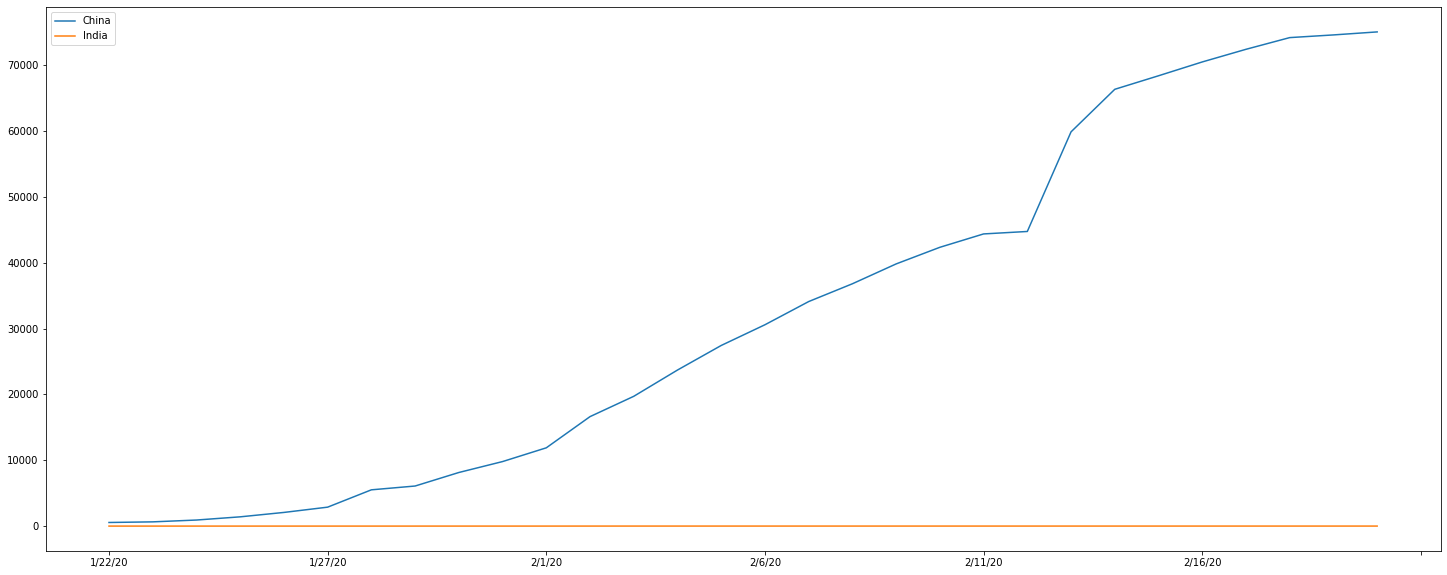

In [89]:
plt.figure(figsize = (25, 10))
df_agg.loc["China"][:30].plot()
df_agg.loc["India"][:30].plot()
plt.legend()

## To check the new confirmed cases we need to find the first derivative by using diff() func 

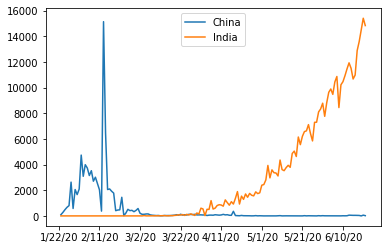

In [90]:
df_agg.loc["China"].diff().plot()
df_agg.loc["India"].diff().plot()
plt.legend()

In [91]:
# Maximum infection rate in china in one day
df_agg.loc["China"].diff().max()


15136.0

In [92]:
# Maximum infection in India in one day
df_agg.loc["India"].diff().max()

15403.0

## Finding the max infection rate for all countries and putting in dataset.

In [93]:
countries = list(df_agg.index)
max_rate = []
for i in countries:
    max_rate.append(df_agg.loc[i].diff().max())

In [94]:
df_agg["max_infect_rate"] = max_rate

In [95]:
df_agg.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  6/13/20  6/14/20  6/15/20  \
Country/Region                             ...                              
Afghanistan           0        0        0  ...    24102    24766    25527   
Albania               0        0        0  ...     1464     1521     1590   
Algeria               0        0        0  ...    10810    10919    11031   
Andorra               0        0        0  ...      853      853      853   
Angola                0        0        0  ...      138      140      142   

                6/16/20  6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  \
Country/Region                                                         
Afghanistan       26310    26874    27532    27878    28424    28833   
Albania            1672     1722     1788     1838     1891     1962   
Algeria           11147    11268    11385    11504    11631    11771   
Andorra             854      854      855      855      855      855   
Angola              148      155      166      172      176      183   

                max_infect_rate  
Country/Region                   
Afghanistan               915.0  
Albania                    82.0  
Algeria                   199.0  
Andorra                    79.0  
Angola                     17.0  

[5 rows x 153 columns]

In [96]:
corona_data = pd.DataFrame(df_agg["max_infect_rate"])

In [97]:
corona_data.head()

max_infect_rate
Country/Region                 
Afghanistan               915.0
Albania                    82.0
Algeria                   199.0
Andorra                    79.0
Angola                     17.0

In [98]:
corona_data.shape

(188, 1)

In [99]:
df_hrep = pd.read_csv("worldwide_happiness_report.csv")
df_hrep.head()

Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                      0.341  
3                      0.118  
4                      0.298

In [100]:
# Deleting useless columns 
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [101]:
df_hrep.drop(useless_cols, axis = 1, inplace = True)
df_hrep.head()

Country or region  GDP per capita  Social support  Healthy life expectancy  \
0           Finland           1.340           1.587                    0.986   
1           Denmark           1.383           1.573                    0.996   
2            Norway           1.488           1.582                    1.028   
3           Iceland           1.380           1.624                    1.026   
4       Netherlands           1.396           1.522                    0.999   

   Freedom to make life choices  
0                         0.596  
1                         0.592  
2                         0.603  
3                         0.591  
4                         0.557

In [102]:
df_hrep.set_index("Country or region", inplace = True)
df_hrep.head()

GDP per capita  Social support  Healthy life expectancy  \
Country or region                                                            
Finland                     1.340           1.587                    0.986   
Denmark                     1.383           1.573                    0.996   
Norway                      1.488           1.582                    1.028   
Iceland                     1.380           1.624                    1.026   
Netherlands                 1.396           1.522                    0.999   

                   Freedom to make life choices  
Country or region                                
Finland                                   0.596  
Denmark                                   0.592  
Norway                                    0.603  
Iceland                                   0.591  
Netherlands                               0.557

In [103]:
corona_data.shape

(188, 1)

In [104]:
df_hrep.shape

(156, 4)

## Performing Inner Join

In [105]:
data = corona_data.join(df_hrep, how = "inner")
data.head()

max_infect_rate  GDP per capita  Social support  \
Afghanistan            915.0           0.350           0.517   
Albania                 82.0           0.947           0.848   
Algeria                199.0           1.002           1.160   
Argentina             2060.0           1.092           1.432   
Armenia                766.0           0.850           1.055   

             Healthy life expectancy  Freedom to make life choices  
Afghanistan                    0.361                         0.000  
Albania                        0.874                         0.383  
Algeria                        0.785                         0.086  
Argentina                      0.881                         0.471  
Armenia                        0.815                         0.283

## Correlation Matrix 

In [106]:
data.corr()

max_infect_rate  GDP per capita  Social support  \
max_infect_rate                      1.000000        0.163941        0.129090   
GDP per capita                       0.163941        1.000000        0.757521   
Social support                       0.129090        0.757521        1.000000   
Healthy life expectancy              0.170824        0.859431        0.751632   
Freedom to make life choices         0.043543        0.394799        0.456317   

                              Healthy life expectancy  \
max_infect_rate                              0.170824   
GDP per capita                               0.859431   
Social support                               0.751632   
Healthy life expectancy                      1.000000   
Freedom to make life choices                 0.423146   

                              Freedom to make life choices  
max_infect_rate                                   0.043543  
GDP per capita                                    0.394799  
Social support                                    0.456317  
Healthy life expectancy                           0.423146  
Freedom to make life choices                      1.000000

## Visualizing the results

#### GDP vs max_infect_rate

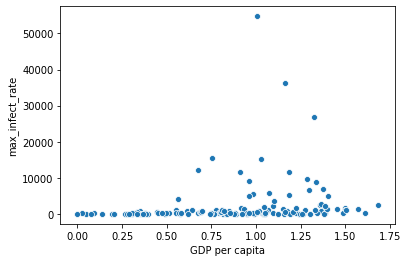

In [107]:
x = data["GDP per capita"]
y = data["max_infect_rate"]
sns.scatterplot(x, y)

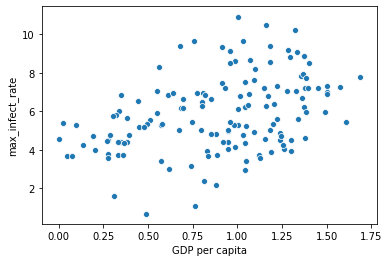

In [108]:
x = data["GDP per capita"]
y = data["max_infect_rate"]
sns.scatterplot(x, np.log(y)) # apply logscalling to y

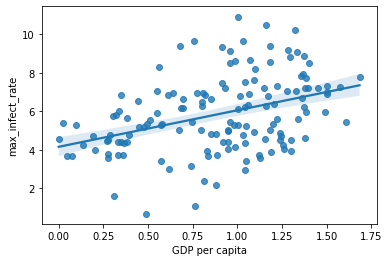

In [109]:
sns.regplot(x, np.log(y))

**_Peoples in developed countries are more prone to corona virus_**